<a href="https://colab.research.google.com/github/Puneet15556/Final_Model/blob/main/Final_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###We are going to Predict the **Popularity** of songs sung by an artist by evaluating various labels such as *Explicit, Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, and Valence* for a music company. If a music company wants to acquire an artist’s songs, it will consider all these attributes to assess whether the songs have the potential to be popular. By analyzing these features, the company can make a decision about signing an artist based on the characteristics of their songs.



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score




In [2]:
path = "/content/tracks.csv"
df = pd.read_csv(path)


## EDA

In [3]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],22-02-1922,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],01-06-1922,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367513 entries, 0 to 367512
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                367513 non-null  object 
 1   name              367512 non-null  object 
 2   popularity        367513 non-null  int64  
 3   duration_ms       367513 non-null  int64  
 4   explicit          367513 non-null  int64  
 5   artists           367513 non-null  object 
 6   id_artists        367513 non-null  object 
 7   release_date      367513 non-null  object 
 8   danceability      367512 non-null  float64
 9   energy            367512 non-null  float64
 10  key               367512 non-null  float64
 11  loudness          367512 non-null  float64
 12  mode              367512 non-null  float64
 13  speechiness       367512 non-null  float64
 14  acousticness      367512 non-null  float64
 15  instrumentalness  367512 non-null  float64
 16  liveness          36

In [5]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,367513.000000,3.675130e+05,367513.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000,367512.000000
mean,27.261645,2.294952e+05,0.039041,0.559612,0.527324,5.211936,-10.501715,0.664561,0.095259,0.464203,0.127228,0.209288,0.551863,118.402417,3.875539
std,19.489029,1.251401e+05,0.193692,0.167769,0.254517,3.517952,5.183599,0.472144,0.164014,0.353125,0.280336,0.181124,0.261604,29.770214,0.466399
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.735730e+05,0.000000,0.447000,0.324000,2.000000,-13.240000,0.000000,0.033900,0.103000,0.000000,0.097400,0.341000,95.743000,4.000000
50%,27.000000,2.127870e+05,0.000000,0.574000,0.531000,5.000000,-9.567000,1.000000,0.043500,0.450000,0.000043,0.136000,0.564000,117.038000,4.000000
75%,41.000000,2.616530e+05,0.000000,0.683000,0.735000,8.000000,-6.688000,1.000000,0.071000,0.806000,0.018700,0.268000,0.775000,136.119000,4.000000
max,100.000000,5.621218e+06,1.000000,0.988000,1.000000,11.000000,5.109000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.507000,5.000000


In [6]:
df.isna()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
367509,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
367510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
367511,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

,0
id,0
name,1
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,1
energy,1


In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

,0
id,object
name,object
popularity,int64
duration_ms,int64
explicit,int64
artists,object
id_artists,object
release_date,object
danceability,float64
energy,float64


In [10]:
dc = df.iloc[:501]

In [11]:
df.size

7350260

In [12]:
df.shape

(367513, 20)

In [13]:
df.nunique()

,0
id,367513
name,283699
popularity,101
duration_ms,90862
explicit,2
artists,73200
id_artists,73717
release_date,17682
danceability,1255
energy,2427


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

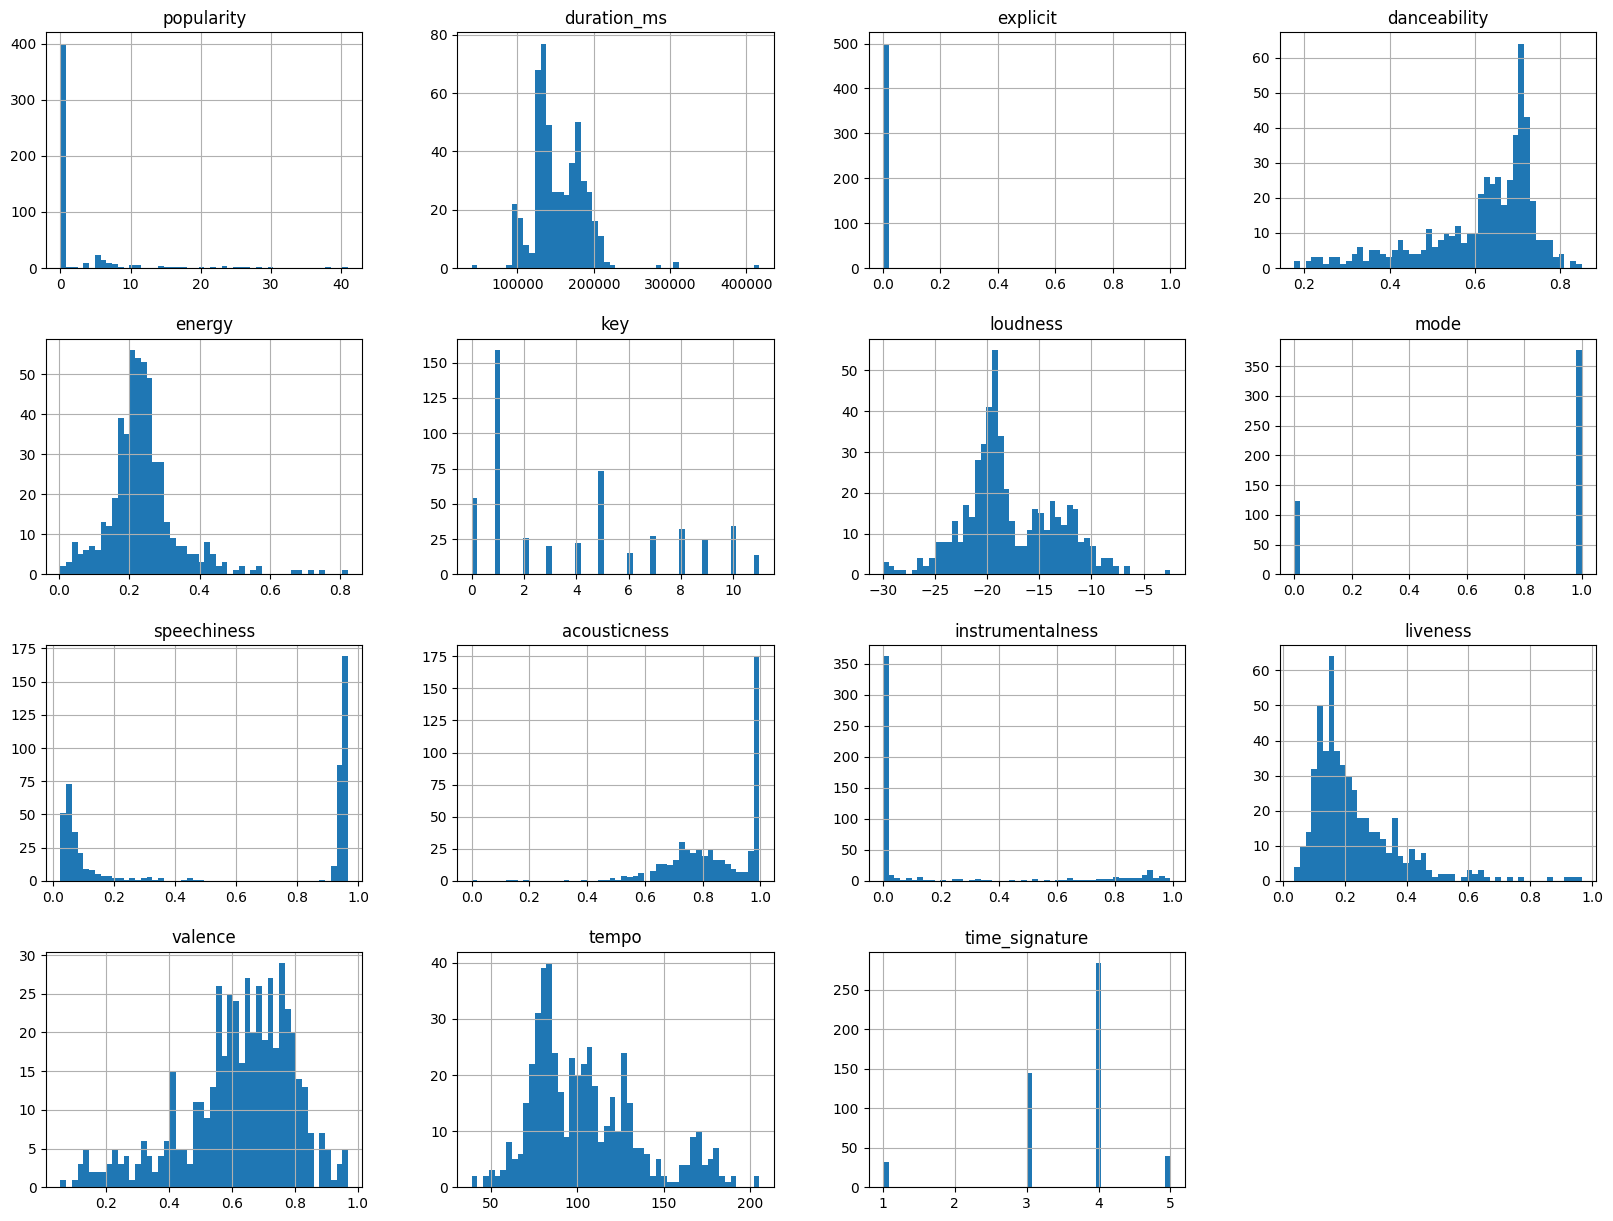

In [14]:
dc.hist(bins=50, figsize=(20, 15))

In [15]:
numerical_cols = dc.select_dtypes(include= np.number).columns
correlation = dc[numerical_cols].corr()

In [16]:
correlation

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.364024,-0.016799,0.014718,-0.177565,0.072624,0.457876,0.075619,-0.411941,0.330814,0.078207,-0.052801,-0.138103,0.017363,0.143688
duration_ms,0.364024,1.000000,-0.043488,-0.397304,0.155112,0.161021,0.554051,0.030773,-0.643409,0.473208,0.258580,-0.006313,-0.189371,0.094093,0.181701
explicit,-0.016799,-0.043488,1.000000,-0.038044,0.263084,0.066169,0.050599,-0.077978,-0.050404,-0.246422,0.063657,0.078914,-0.055908,-0.011053,0.020275
danceability,0.014718,-0.397304,-0.038044,1.000000,-0.057246,-0.166383,-0.159095,0.074113,0.629627,-0.439110,-0.446862,-0.152799,0.568625,-0.021191,-0.054345
energy,-0.177565,0.155112,0.263084,-0.057246,1.000000,0.117641,0.473075,-0.029065,-0.096266,-0.232410,0.034793,0.240825,0.173230,0.140062,0.049690
key,0.072624,0.161021,0.066169,-0.166383,0.117641,1.000000,0.165870,-0.197004,-0.303454,0.127448,0.221687,0.060541,-0.098618,0.007846,0.108711
loudness,0.457876,0.554051,0.050599,-0.159095,0.473075,0.165870,1.000000,0.101499,-0.555751,0.317153,0.015958,0.056540,-0.084838,0.153594,0.198474
mode,0.075619,0.030773,-0.077978,0.074113,-0.029065,-0.197004,0.101499,1.000000,0.034759,-0.009502,-0.109117,-0.007635,0.049653,0.082061,-0.040496
speechiness,-0.411941,-0.643409,-0.050404,0.629627,-0.096266,-0.303454,-0.555751,0.034759,1.000000,-0.656708,-0.548762,-0.025731,0.359452,-0.090776,-0.241261
acousticness,0.330814,0.473208,-0.246422,-0.439110,-0.232410,0.127448,0.317153,-0.009502,-0.656708,1.000000,0.330729,-0.036946,-0.086570,0.022137,0.137058


array([[<Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='acousticness', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>],
       [<Axes: xlabel='danceability', ylabel='energy'>,
        <Axes: xlabel='energy', ylabel='energy'>,
        <Axes: xlabel='acousticness', ylabel='energy'>,
        <Axes: xlabel='instrumentalness', ylabel='energy'>],
       [<Axes: xlabel='danceability', ylabel='acousticness'>,
        <Axes: xlabel='energy', ylabel='acousticness'>,
        <Axes: xlabel='acousticness', ylabel='acousticness'>,
        <Axes: xlabel='instrumentalness', ylabel='acousticness'>],
       [<Axes: xlabel='danceability', ylabel='instrumentalness'>,
        <Axes: xlabel='energy', ylabel='instrumentalness'>,
        <Axes: xlabel='acousticness', ylabel='instrumentalness'>,
        <Axes: xlabel='instrumentalness', ylabel='instrumentalness'>]],
      dtype=object)

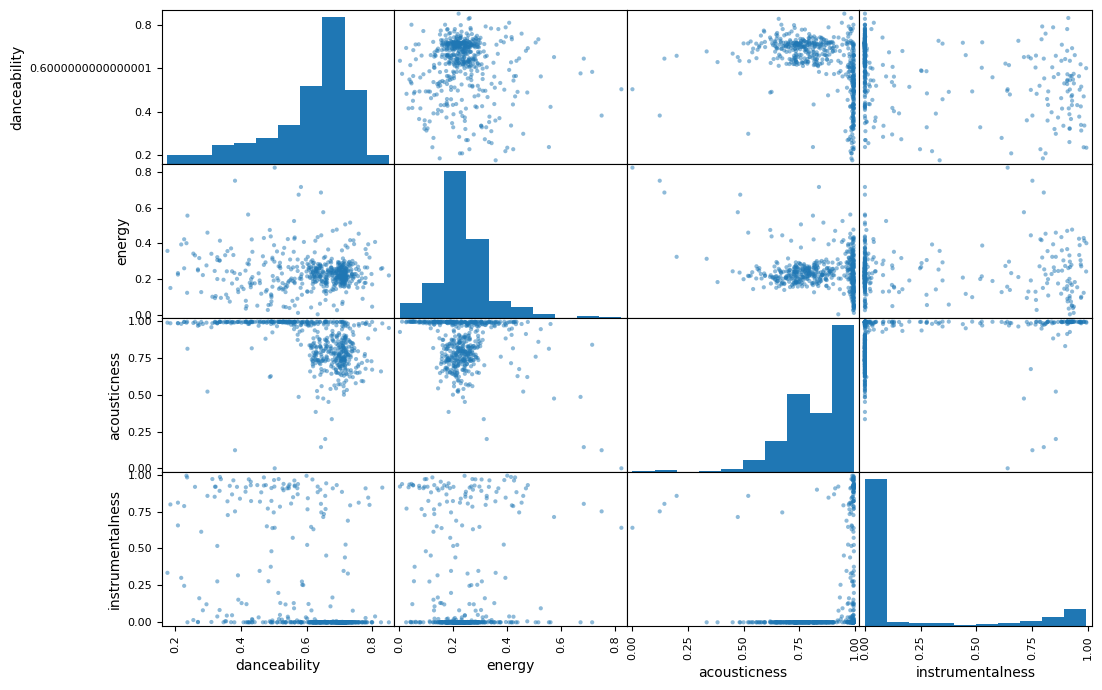

In [17]:
attributes = ["danceability" , "energy" , "acousticness" ,"instrumentalness" ]
scatter_matrix(dc[attributes], figsize = (12,8))

<Axes: xlabel='energy'>

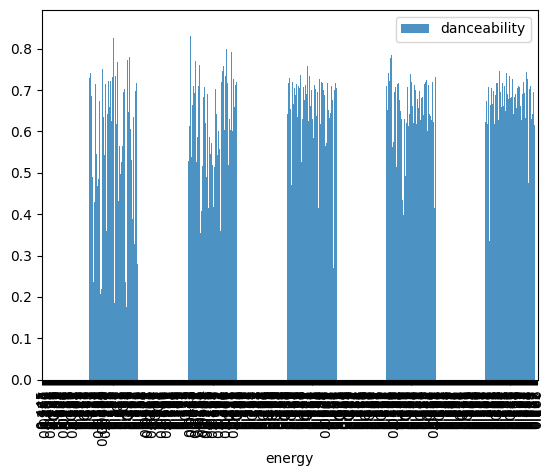

In [18]:
dc.plot(kind="bar", x="energy", y="danceability", alpha=0.8)

<Axes: >

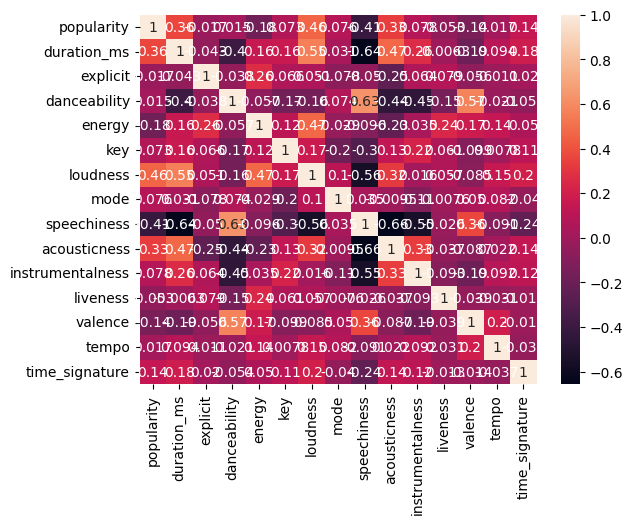

In [83]:
sns.heatmap(correlation , xticklabels=correlation.columns , yticklabels=correlation.columns , annot=True , )

# New Feature

### I have added all the Features required for prediction of popularity of songs in One Label(Column).

In [19]:
df['Singing Quality'] = df['acousticness'] +  df['energy'] + df['instrumentalness'] + df['liveness'] + df['speechiness'] + df['valence'] - df['explicit']

In [20]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Singing Quality
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],22-02-1922,0.645,0.4450,...,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0,2.592
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],01-06-1922,0.695,0.2630,...,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0,2.820
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.434,0.1770,...,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0,1.913
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.321,0.0946,...,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0,2.559
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0,1.823


In [21]:
dc = df.iloc[:501]

<Axes: xlabel='popularity', ylabel='Singing Quality'>

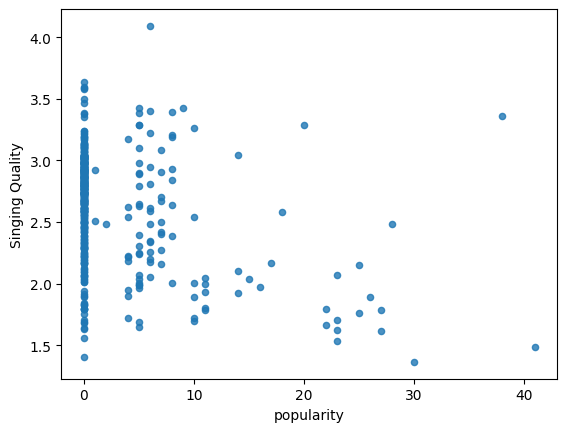

In [22]:
 dc.plot(kind="scatter", x="popularity", y="Singing Quality", alpha=0.8)

In [23]:
df.dropna(inplace=True)

In [24]:
encoder = LabelEncoder()

In [25]:
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        df[column] = encoder.fit_transform(df[column])

#Train-Test Split


In [26]:
X = df[["Singing Quality"]]
Y = df[["popularity"]]

In [27]:
X_train , X_test , Y_train , Y_test  = train_test_split(X,Y, test_size=0.3 , shuffle=True)

In [28]:
from sklearn.linear_model import LinearRegression

## Using Linear Regression for predicting values for target 'popularity'

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
model_Y_predict = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [33]:
mse = mean_squared_error(Y_test, model_Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, model_Y_predict)

In [34]:
print(rmse)
print(r2)

18.57678505542807
0.09224587784584082


##I Have Used Normalization to get more accurate and less error values

In [35]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):# To Check if the column is numeric
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  else:
    df[column] = "No Numeric Value Found"

In [36]:
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Singing Quality
0,0.414367,0.133128,0.06,0.021994,0.0,0.913208,0.532395,0.718851,0.652834,0.4450,...,0.716675,1.0,0.464470,0.676707,0.744000,0.151,0.127,0.430587,0.6,0.569050
1,0.004710,0.129427,0.00,0.016885,0.0,0.288532,0.140472,0.022453,0.703441,0.2630,...,0.581548,1.0,0.985582,0.800201,0.000000,0.148,0.655,0.418916,0.2,0.611202
2,0.016073,0.855740,0.00,0.031737,0.0,0.390120,0.692143,0.690232,0.439271,0.1770,...,0.596231,1.0,0.052729,0.997992,0.021800,0.212,0.457,0.535582,1.0,0.443518
3,0.018579,0.233245,0.00,0.030895,0.0,0.390120,0.692143,0.690232,0.324899,0.0946,...,0.492083,1.0,0.051905,0.998996,0.918000,0.104,0.397,0.698050,0.6,0.562949
4,0.020310,0.442708,0.00,0.028434,0.0,0.219473,0.422039,0.635089,0.406883,0.1580,...,0.661967,0.0,0.040165,0.992972,0.130000,0.311,0.196,0.423889,0.8,0.426879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367507,0.986588,0.216996,0.17,0.033470,0.0,0.386868,0.938806,0.868164,0.665992,0.6770,...,0.780629,1.0,0.062513,0.577309,0.000010,0.147,0.783,0.460213,0.8,0.504474
367508,0.998819,0.116536,0.17,0.040820,0.0,0.977363,0.655258,0.651038,0.271255,0.4300,...,0.745842,0.0,0.036869,0.423695,0.000000,0.102,0.367,0.374129,0.8,0.340689
367509,0.279590,0.755017,0.18,0.054365,0.0,0.474152,0.444435,0.152367,0.449393,0.3230,...,0.692900,0.0,0.047580,0.727912,0.000025,0.134,0.155,0.516515,0.6,0.345574
367510,0.791723,0.892220,0.18,0.014737,0.0,0.974945,0.342124,0.862338,0.652834,0.6230,...,0.753920,1.0,0.037796,0.058635,0.030700,0.249,0.942,0.472245,0.8,0.448473


In [37]:
X = df[["Singing Quality"]]
Y = df[["popularity"]]
X_train , X_test , Y_train , Y_test  = train_test_split(X,Y, test_size=0.3 , shuffle=True)
model.fit(X_train, Y_train)
model_Y_predict = model.predict(X_test)
mse = mean_squared_error(Y_test, model_Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, model_Y_predict)
print("The Root mean square of the model is:" ,rmse)
print("The R2_score of the model is:" ,r2)

The Root mean square of the model is: 0.18516828399861424
The R2_score of the model is: 0.09738677495580894


In [38]:
#After using Normalization we get more accuartate target values and Less error for our model to work perfectly

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
scores = cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [41]:
print(rmse_scores)

[0.20947894 0.23518678 0.24933487 0.19631764 0.16722329 0.16152763
 0.16472359 0.16469393 0.17069534 0.15449992]


In [42]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [43]:
print_scores(rmse_scores)

Scores: [0.20947894 0.23518678 0.24933487 0.19631764 0.16722329 0.16152763
 0.16472359 0.16469393 0.17069534 0.15449992]
Mean: 0.18736819393874438
Standard deviation: 0.031865694242584376


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Now Using Decision Tree Regressor to get same target value

In [45]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
model_Y_predict2 = model2.predict(X_test)
mse2 = mean_squared_error(Y_test, model_Y_predict2)
rmse2 = np.sqrt(mse2)

print("The Root mean square of the model is:" ,rmse2)


The Root mean square of the model is: 0.22345713820362972


In [47]:
scores2 = cross_val_score(model2, X, Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores2 = np.sqrt(-scores2)


In [48]:
print_scores(rmse_scores2)

Scores: [0.23920949 0.26866605 0.27576239 0.22757946 0.21133177 0.20519625
 0.20933279 0.20969579 0.21115586 0.20357279]
Mean: 0.2261502642462053
Standard deviation: 0.025275187026859935


Now Using Random Forest Regressor to get same target value

In [49]:
model3 = RandomForestRegressor()
model3.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [50]:
model_Y_predict3 = model3.predict(X_test)
mse3 = mean_squared_error(Y_test, model_Y_predict3)
rmse3 = np.sqrt(mse3)

print("The Root mean square of the model is:" ,rmse3)

The Root mean square of the model is: 0.20648122187087475


### After the Analysis and Prediction using different ML models we come to the conclusion that the best predictions and least error is gven by training **Linear regression model**

In [51]:
scores3 = cross_val_score(model3, X, Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores3 = np.sqrt(-scores3)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [52]:
print_scores(rmse_scores3)

Scores: [0.22813868 0.25386426 0.2629064  0.21276142 0.1917617  0.18568087
 0.19025791 0.19120529 0.1926892  0.18350916]
Mean: 0.2092774893599148
Standard deviation: 0.027790381238691302


## Using Classifiers to Classify mode i.e. 0 and 1 on the basis of labels like 'tempo' , 'valence' , 'liveness'

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
x = df[['tempo', 'liveness', 'valence']]
y = df[["mode"]]

In [55]:
knn = KNeighborsRegressor(n_neighbors=5)

In [56]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , shuffle=True , random_state=42)

In [57]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [58]:
model_y_predict = knn.predict(x_test)

In [59]:
model_y_predict

array([[0.4],
       [0.8],
       [1. ],
       ...,
       [0.8],
       [0.6],
       [1. ]])

In [60]:
model_y_predict_binary = (model_y_predict >= 0.5).astype(int)


In [61]:
model_y_predict_binary

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy = accuracy_score(y_test, model_y_predict_binary)

In [64]:
accuracy

0.6043698896643674

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confs = confusion_matrix(y_test, model_y_predict_binary)

In [67]:
confs

array([[ 5909, 18597],
       [10483, 38514]])

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
precision_score(y_test, model_y_predict_binary)

0.6743709618112097

In [70]:
recall_score(y_test, model_y_predict_binary)

0.7860481253954323

# Saving Our Model

In [71]:
from joblib import dump , load

In [72]:
dump(model , 'Model.joblib')

['Model.joblib']

In [80]:
print(model_Y_predict)

[[0.26357961]
 [0.28185441]
 [0.29275059]
 ...
 [0.21810011]
 [0.2254625 ]
 [0.25083853]]
